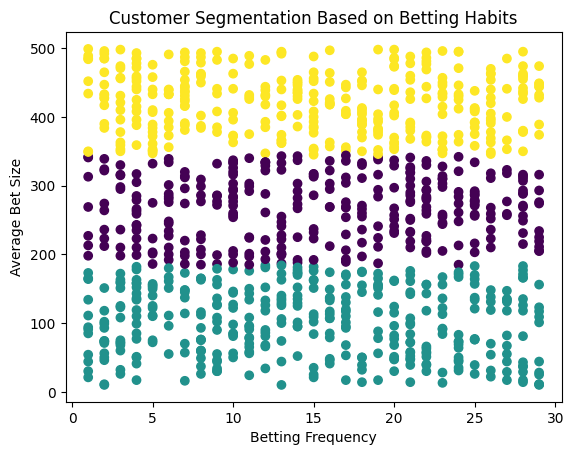

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from dowhy import CausalModel

import warnings
# Ignore only FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Step 1: Simulate Customer Data

# Generate customer data (hypothetical example)
np.random.seed(42)
n_customers = 1000

data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=n_customers),
    'account_balance': np.random.randint(100, 10000, size=n_customers),
    # Bets per month
    'betting_frequency': np.random.randint(1, 30, size=n_customers),
    # Average bet amount
    'average_bet_size': np.random.randint(10, 500, size=n_customers),
    'preferred_sport': np.random.choice(['Football', 'Tennis', 'Basketball', 'Horse Racing'], size=n_customers),
    # Treatment: whether a bonus was received
    'bonus_received': np.random.choice([0, 1], size=n_customers),
    # Outcome: total bet amount
    'total_bet_amount': np.random.randint(100, 10000, size=n_customers)
})


# Step 2: Segment Customers Using KMeans Clustering

# Segment customers based on their betting habits (betting frequency and average bet size)
X = data[['betting_frequency', 'average_bet_size']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['segment'] = kmeans.fit_predict(X)

# Visualize the clusters (optional)
plt.scatter(data['betting_frequency'],
            data['average_bet_size'], c=data['segment'])
plt.xlabel('Betting Frequency')
plt.ylabel('Average Bet Size')
plt.title('Customer Segmentation Based on Betting Habits')
plt.show()

In [11]:

# Step 3: Define the Causal Model

# We're interested in the causal effect of the bonus on total bet amount
model = CausalModel(
    data=data,
    treatment='bonus_received',  # Treatment: Whether the customer received a bonus
    outcome='total_bet_amount',  # Outcome: Total bet amount
    common_causes=['age', 'account_balance', 'betting_frequency',
                   'average_bet_size', 'preferred_sport']  # Confounders
)

# Identify the causal effect
identified_estimand = model.identify_effect()


# Step 4: Estimate the Causal Effect for Each Segment

causal_estimates = {}

for segment in data['segment'].unique():
    print(f"\nEstimating causal effect for Segment {segment}")
    segment_data = data[data['segment'] == segment]

    # Update the causal model with the data for this segment
    segment_model = CausalModel(
        data=segment_data,
        treatment='bonus_received',
        outcome='total_bet_amount',
        common_causes=['age', 'account_balance',
                       'betting_frequency', 'average_bet_size', 'preferred_sport']
    )

    # Identify the causal effect
    identified_estimand = segment_model.identify_effect()

    # Estimate the causal effect using linear regression
    causal_estimate = segment_model.estimate_effect(
        identified_estimand, method_name="backdoor.linear_regression")

    # Store the causal effect for this segment
    causal_estimates[segment] = causal_estimate.value

    # Print the result
    print(f"Causal Estimate for Segment {segment}: {causal_estimate.value}")

# Step 5: Interpret Results

print("\n")
for segment, estimate in causal_estimates.items():
    print(
        f"Segment {segment}: Estimated causal effect of bonus on total bet amount: {estimate:.2f}")


Estimating causal effect for Segment 2
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal Estimate for Segment 2: -292.3679490485056

Estimating causal effect for Segment 1
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal Estimate for Segment 1: 116.18193595230605

Estimating causal effect for Segment 0
linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal Estimate for Segment 0: -360.29999718197996


Segment 2: Estimated causal effect of bonus on total bet amount: -292.37
Segment 1: Estimated causal effect of bonus on tota

In [12]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
from sklearn.linear_model import LogisticRegression
import dowhy.datasets


In [13]:

# Step 1: Simulate a dataset
# Let's simulate some data with a known causal effect
data = dowhy.datasets.linear_dataset(
    beta=10,  # The effect size of the treatment on the outcome
    # A confounding variable (e.g., age or health condition)
    num_common_causes=1,
    num_instruments=0,    # No instrumental variables
    num_treatments=1,     # Treatment: whether or not a patient received the drug
    num_samples=1000,     # Number of patients
    treatment_is_binary=True,  # The treatment is binary (took the drug or not)
    num_effect_modifiers=0,    # No effect modifiers
    stddev_treatment_noise=0.1  # Add noise to simulate real-world variability
)

# Convert the generated data into a Pandas DataFrame
df = data['df']

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal Estimate is  9.998631254181664
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'tre

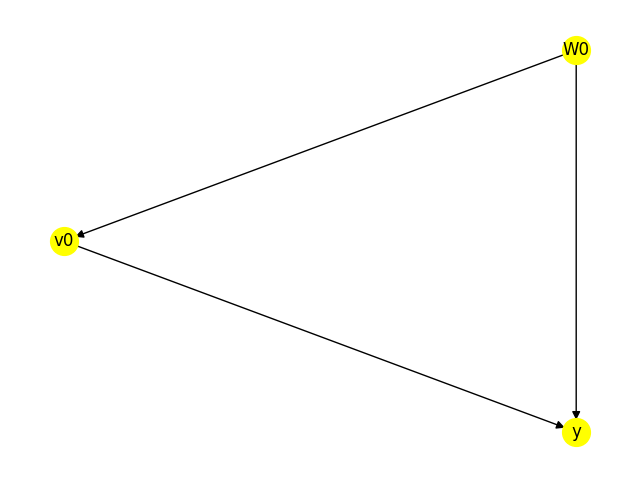

In [14]:

# Step 2: Define a causal model
# In this step, we specify the causal relationships between variables.
model = CausalModel(
    data=df,
    treatment=data['treatment_name'],  # The treatment variable (drug)
    # The outcome variable (health improvement)
    outcome=data['outcome_name'],
    # The confounder (age/health condition)
    common_causes=data['common_causes_names']
)

# Visualize the causal graph
model.view_model()

# Step 3: Identify the causal effect
# We now want to estimate the effect of the treatment on the outcome.
identified_estimand = model.identify_effect()

# Step 4: Estimate the causal effect
# We'll use linear regression as our method to estimate the causal effect.
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Print the causal effect estimate
print("Causal Estimate is ", causal_estimate.value)

# Step 5: Refute the estimate to check robustness
# Test the robustness of the causal effect using placebo treatment
refutation = model.refute_estimate(
    identified_estimand, causal_estimate, method_name="placebo_treatment_refuter")
print(refutation)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Estimated causal effect: 0.23662752909480034
Mean Squared Error: 5.119430295392419

Test Predictions vs. Actual Spending Scores:
True Spending Score: 40, Predicted Spending Score: 38.87
True Spending Score: 70, Predicted Spending Score: 67.00


c:\Users\stefa\anaconda3\envs\pyimage\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


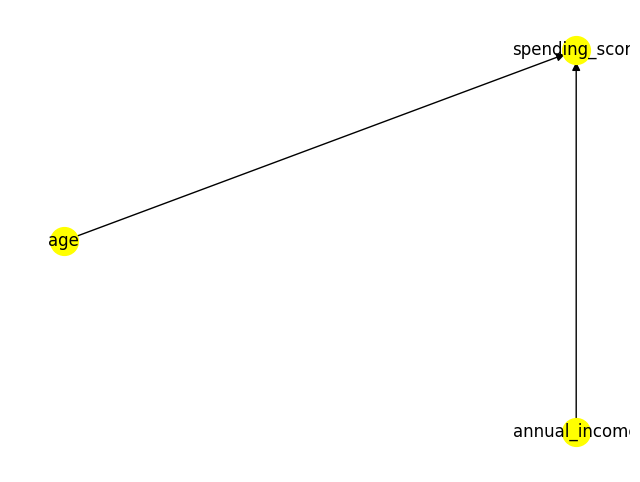

In [15]:
import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 1: Simulate a simple dataset describing customer financial behavior
data = pd.DataFrame({
    'age': [25, 45, 35, 50, 23, 40, 60, 32, 29, 55],
    'annual_income': [30000, 80000, 50000, 100000, 20000, 60000, 90000, 45000, 40000, 110000],
    'spending_score': [30, 70, 50, 80, 20, 60, 75, 45, 40, 85],
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# Drop 'customer_id' since it's not causally related to spending score
data = data.drop(columns=['customer_id'])

# Step 2: Define a Causal Model
# We assume that 'age' and 'annual_income' both causally affect 'spending_score'
model = CausalModel(
    data=data,
    treatment=['age', 'annual_income'],  # Potential causes of the outcome
    outcome='spending_score',  # The outcome we are interested in
    common_causes=None  # Assume no unobserved confounders for simplicity
)

# Visualize the causal model
model.view_model()

# Step 3: Identify the Causal Effect
# Using the backdoor criterion to identify the causal effect of 'age' and 'annual_income' on 'spending_score'
identified_estimand = model.identify_effect()

# Step 4: Estimate the Causal Effect using linear regression
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Print the estimated causal effect
print("Estimated causal effect:", causal_estimate.value)

# Step 5: Use Causal Feature Selection for Machine Learning
# Based on causal analysis, we use 'age' and 'annual_income' as features

# Define features (X) and target (y)
X = data[['age', 'annual_income']]  # Causal features
y = data['spending_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 6: Train a Machine Learning Model (Linear Regression)
ml_model = LinearRegression()
ml_model.fit(X_train, y_train)

# Step 7: Predict the spending_score on the test set
y_pred = ml_model.predict(X_test)

# Evaluate the model (e.g., Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 8: Interpret the Machine Learning Model's Predictions
print("\nTest Predictions vs. Actual Spending Scores:")
for true_value, predicted_value in zip(y_test, y_pred):
    print(
        f"True Spending Score: {true_value}, Predicted Spending Score: {predicted_value:.2f}")

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Estimated causal effect: -0.03018510625673798
Mean Squared Error: 946.0320508392675

Test Predictions vs. Actual Spending Scores:
True Spending Score: 48, Predicted Spending Score: 50.03
True Spending Score: 36, Predicted Spending Score: 44.34
True Spending Score: 89, Predicted Spending Score: 42.83
True Spending Score: 73, Predicted Spending Score: 43.73
True Spending Score: 97, Predicted Spending Score: 53.31
True Spending Score: 98, Predicted Spending Score: 47.20
True Spending Score: 1, Predicted Spending Score: 49.81
True Spending Score: 60, Predicted Spending Score: 50.94
True Spending Score: 2, Predicted Spending Score: 49.01
True Spending Score: 59, Predicted Spending Score: 46.38
True Spending Score: 54, Predicted Spending Score: 46.29
True Spending Score: 32, Predicted Spending 

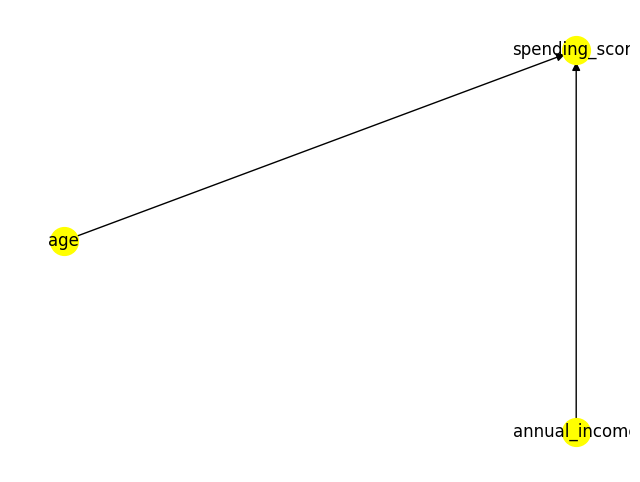

In [16]:
import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 1: Simulate a dataset with 50 observations describing customer financial behavior
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),  # Random ages between 18 and 70
    # Random incomes between 20k and 120k
    'annual_income': np.random.randint(20000, 120000, size=100),
    # Random spending scores between 1 and 100
    'spending_score': np.random.randint(1, 100, size=100),
    'customer_id': np.arange(1, 101)  # Customer IDs from 1 to 50
})

# Drop 'customer_id' since it's not causally related to spending score
data = data.drop(columns=['customer_id'])

# Step 2: Define a Causal Model
# We assume that 'age' and 'annual_income' both causally affect 'spending_score'
model = CausalModel(
    data=data,
    treatment=['age', 'annual_income'],  # Potential causes of the outcome
    outcome='spending_score',  # The outcome we are interested in
    common_causes=None  # Assume no unobserved confounders for simplicity
)

# Visualize the causal model
model.view_model()

# Step 3: Identify the Causal Effect
# Using the backdoor criterion to identify the causal effect of 'age' and 'annual_income' on 'spending_score'
identified_estimand = model.identify_effect()

# Step 4: Estimate the Causal Effect using linear regression
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Print the estimated causal effect
print("Estimated causal effect:", causal_estimate.value)

# Step 5: Use Causal Feature Selection for Machine Learning
# Based on causal analysis, we use 'age' and 'annual_income' as features

# Define features (X) and target (y)
X = data[['age', 'annual_income']]  # Causal features
y = data['spending_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 6: Train a Machine Learning Model (Linear Regression)
ml_model = LinearRegression()
ml_model.fit(X_train, y_train)

# Step 7: Predict the spending_score on the test set
y_pred = ml_model.predict(X_test)

# Evaluate the model (e.g., Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 8: Interpret the Machine Learning Model's Predictions
print("\nTest Predictions vs. Actual Spending Scores:")
for true_value, predicted_value in zip(y_test, y_pred):
    print(
        f"True Spending Score: {true_value}, Predicted Spending Score: {predicted_value:.2f}")

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['age', 'annual_income']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                     
────(E[score_spending])
d[T]                   
Estimand assumption 1, Unconfoundedness: If U→{T} and U→score_spending then P(score_spending|T,,U) = P(score_spending|T,)

## Realized estimand
b: score_spending~T+T*age+T*annual_income
Target units: ate

## Estimate
Mean value: 30.499999999711633
### Conditional Estimates
__categorical__age  __categorical__annual_income
(24.999, 29.0]      (39999.999, 56000.0]             2.5
(29.0, 33.0]        (56000.0, 72000.0]              17.5
(33.0, 39.0]        (72000.0, 88000.0]              32.5
(39.0, 46.0]        (88000.0, 104000.0]             42.5
(46.0, 50.

c:\Users\stefa\anaconda3\envs\pyimage\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


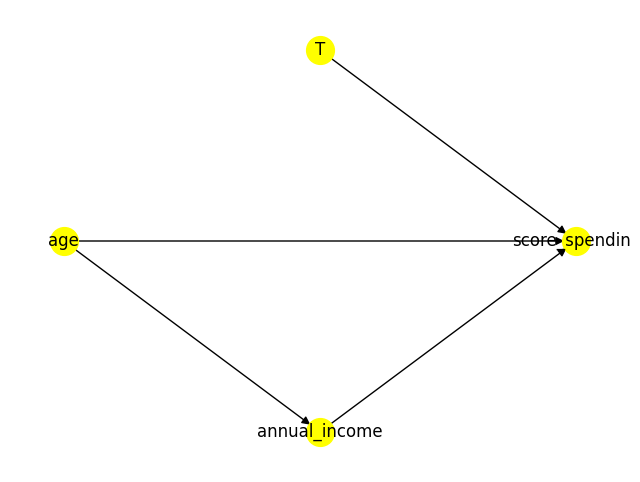

In [17]:
import dowhy
from dowhy import CausalModel
import pandas as pd

# Creiamo un dataset di esempio
data = {
    'age': [25, 45, 30, 35, 50],
    'annual_income': [40000, 100000, 60000, 80000, 120000],
    'score_spending': [30, 70, 50, 60, 90]
}

df = pd.DataFrame(data)

# Definizione della variabile di trattamento basata sulla soglia di reddito annuo
df['T'] = df['annual_income'].apply(lambda x: 1 if x > 50000 else 0)

# Creazione del modello causale con DoWhy
model = CausalModel(
    data=df,
    treatment='T',
    outcome='score_spending',
    graph="digraph {age -> annual_income -> score_spending; age -> score_spending; T -> score_spending;}"
)

# Visualizzazione del grafico causale
model.view_model()

# Identificazione dell'effetto causale del trattamento
identified_estimand = model.identify_effect()

# Stima dell'effetto causale usando la regressione lineare
estimate = model.estimate_effect(
    identified_estimand, method_name="backdoor.linear_regression")

# Stampa del risultato
print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['age', 'annual_income']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                     
────(E[score_spending])
d[T]                   
Estimand assumption 1, Unconfoundedness: If U→{T} and U→score_spending then P(score_spending|T,,U) = P(score_spending|T,)

## Realized estimand
b: score_spending~T+T*age+T*annual_income
Target units: ate

## Estimate
Mean value: -4.3966306900890615
### Conditional Estimates
__categorical__age  __categorical__annual_income
(17.999, 26.0]      (20205.999, 46071.8]            -5.097921
                    (46071.8, 73757.6]              -6.868250
                    (73757.6, 102219.6]             -8.486289
                    (102219.6, 129782.2]           

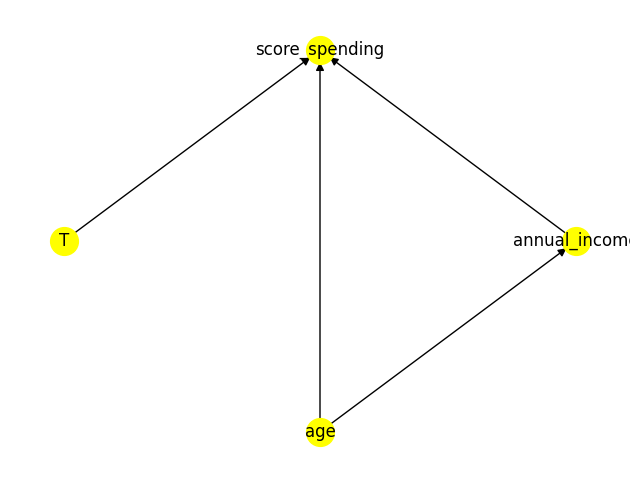

In [19]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

import warnings
# Ignore only FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Ignore DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Dataset Simulation
np.random.seed(42)
data = {
    # Simulating ages between 18 and 65
    'age': np.random.randint(18, 65, size=100),
    # Simulating annual incomes between 20k and 150k
    'annual_income': np.random.randint(20000, 150000, size=100),
    # Simulating spending scores between 20 and 100
    'score_spending': np.random.randint(20, 100, size=100)
}

df = pd.DataFrame(data)

# Treatment variable setting
df['T'] = df['annual_income'].apply(lambda x: 1 if x > 50000 else 0)


# Cauasal Modelling using DoWhy
model = CausalModel(
    data=df,
    treatment='T',
    outcome='score_spending',
    graph="""
    digraph {
        age -> annual_income -> score_spending;
        age -> score_spending;
        T [label="T (annual_income > 50k)"];
        T -> score_spending;
    }
    """
)

# DAG Visualization
model.view_model()

# Causal effect identification
identified_estimand = model.identify_effect()

# Causal effect esimation using Linear Regression
estimate = model.estimate_effect(
    identified_estimand, method_name="backdoor.linear_regression")
# Stampa del risultato
print(estimate)


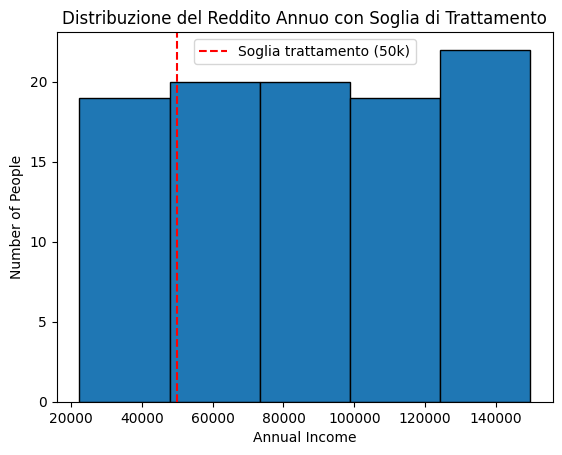

In [4]:
import matplotlib.pyplot as plt

# Creazione di un istogramma per mostrare la distribuzione della variabile 'annual_income'
plt.hist(df['annual_income'], bins=5, edgecolor='black')
plt.axvline(x=50000, color='r', linestyle='--',
            label='Soglia trattamento (50k)')
plt.xlabel('Annual Income')
plt.ylabel('Number of People')
plt.title('Distribuzione del Reddito Annuo con Soglia di Trattamento')
plt.legend()
plt.show()

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                          
─────────────(E[reddito|background_familiare,IQ])
d[istruzione]                                    
Estimand assumption 1, Unconfoundedness: If U→{istruzione} and U→reddito then P(reddito|istruzione,background_familiare,IQ,U) = P(reddito|istruzione,background_familiare,IQ)

## Realized estimand
b: reddito~istruzione+background_familiare+IQ
Target units: ate

## Estimate
Mean value: 2250.000000000002



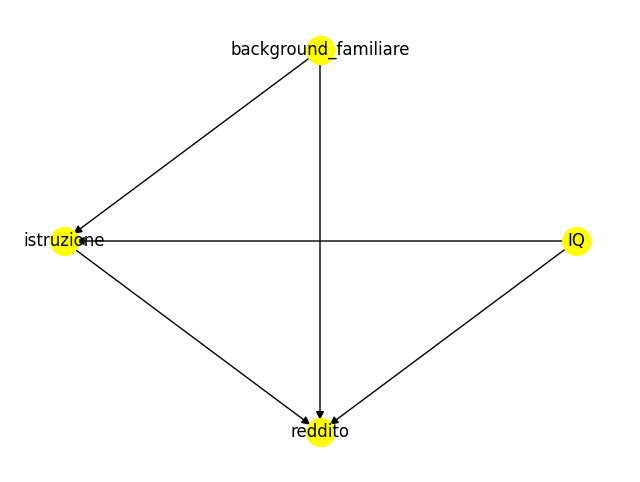

In [7]:
import dowhy
from dowhy import CausalModel
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Supponiamo di avere un dataset con variabili:
# istruzione (treatment), reddito (outcome), IQ (cofounder), background familiare (cofounder)

# Creazione di un dataset di esempio
data = pd.DataFrame({
    'istruzione': [12, 16, 14, 10, 18],
    'reddito': [40000, 50000, 45000, 38000, 55000],
    'IQ': [110, 115, 120, 105, 130],
    'background_familiare': [2, 3, 4, 1, 5]
})

# Definizione del modello causale
model = CausalModel(
    data=data,
    treatment='istruzione',
    outcome='reddito',
    common_causes=['IQ', 'background_familiare']
)

# Visualizzazione del grafo causale
model.view_model()

# Identificazione del metodo per stimare l'effetto causale
identified_estimand = model.identify_effect()

# Stima dell'effetto causale
estimate = model.estimate_effect(
    identified_estimand, method_name="backdoor.linear_regression")

# Stampa dell'effetto stimato
print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                
──────────────────(E[spending_score|age])
d[annual_incoming]                       
Estimand assumption 1, Unconfoundedness: If U→{annual_incoming} and U→spending_score then P(spending_score|annual_incoming,age,U) = P(spending_score|annual_incoming,age)

## Realized estimand
b: spending_score~annual_incoming+age
Target units: ate

## Estimate
Mean value: 0.00046954540866295247

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test

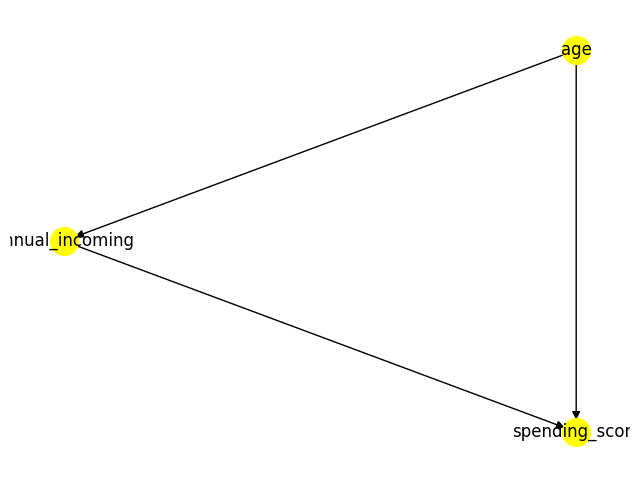

In [12]:
import dowhy
from dowhy import CausalModel
import pandas as pd

# Creazione del dataset
data = pd.DataFrame({
    'age': [25, 45, 35, 50, 23, 36, 42, 58, 30, 40],
    'annual_incoming': [40000, 60000, 45000, 70000, 38000, 52000, 64000, 72000, 48000, 62000],
    'spending_score': [50, 70, 60, 80, 55, 65, 75, 85, 58, 68]
})

# Definizione del modello causale
model = CausalModel(
    data=data,
    treatment='annual_incoming',
    outcome='spending_score',
    common_causes=['age']  # age è il cofounder
)

# Visualizzazione del modello causale
model.view_model()

# Identificazione del metodo per stimare l'effetto causale
identified_estimand = model.identify_effect()

# Stima dell'effetto causale usando la regressione lineare
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Stampa dell'effetto stimato
print(estimate)

# Validazione delle ipotesi
refutation = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refutation)



propensity_score_matching
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                      
────────────(E[spending_score|age,zip_code,annual_incoming])
d[treatment]                                                
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→spending_score then P(spending_score|treatment,age,zip_code,annual_incoming,U) = P(spending_score|treatment,age,zip_code,annual_incoming)

## Realized estimand
b: spending_score~treatment+age+zip_code+annual_incoming
Target units: ate

## Estimate
Mean value: -3.8



ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int32(0)

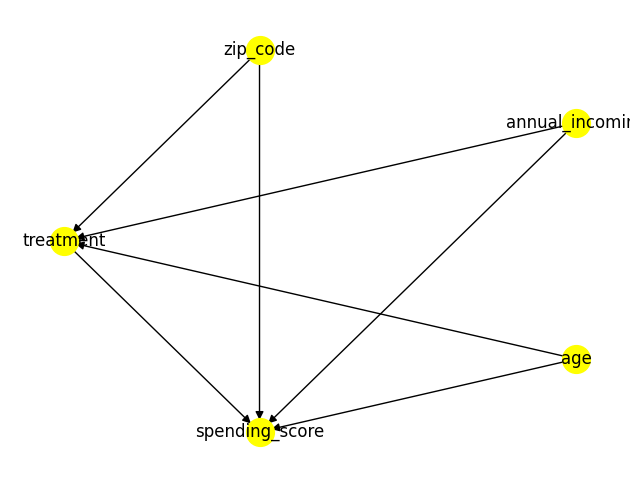

In [13]:

import dowhy
from dowhy import CausalModel
import pandas as pd

# Creazione del dataset con la variabile di trattamento dicotomica
data = pd.DataFrame({
    'age': [25, 45, 35, 50, 23, 36, 42, 58, 30, 40],
    'annual_incoming': [40000, 60000, 45000, 70000, 38000, 52000, 64000, 72000, 48000, 62000],
    'spending_score': [50, 70, 60, 80, 55, 65, 75, 85, 58, 68],
    'zip_code': [12345, 12346, 12347, 12348, 12349, 12345, 12346, 12347, 12348, 12349],
    # Variabile dicotomica: 1 = promozione ricevuta, 0 = no promozione
    'treatment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
})

# Definizione del modello causale
model = CausalModel(
    data=data,
    treatment='treatment',  # Variabile di trattamento dicotomica
    outcome='spending_score',  # Outcome
    common_causes=['age', 'annual_incoming', 'zip_code']  # Confounder
)

# Visualizzazione del modello causale
model.view_model()

# Identificazione del metodo per stimare l'effetto causale
identified_estimand = model.identify_effect()

# Stima dell'effetto causale usando un modello adatto per variabili dicotomiche
estimate = model.estimate_effect(
    identified_estimand, method_name="backdoor.propensity_score_matching")

# Stampa dell'effetto stimato
print(estimate)

# Validazione delle ipotesi con refutazione
refutation = model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refutation)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                       d                                               
────────────────────────────────────────────────(E[spending_score|age])
d[treatment_annual_incoming  treatment_zip_code]                       
Estimand assumption 1, Unconfoundedness: If U→{treatment_annual_incoming,treatment_zip_code} and U→spending_score then P(spending_score|treatment_annual_incoming,treatment_zip_code,age,U) = P(spending_score|treatment_annual_incoming,treatment_zip_code,age)

## Realized estimand
b: spending_score~treatment_annual_incoming+treatment_zip_code+age
Target units: ate

## Estimate
Mean value: 5.921100917431119

{'control_value': 0, 'treatment

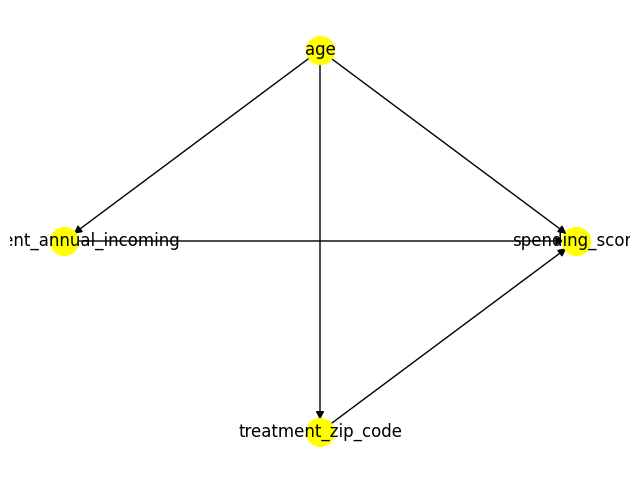

In [14]:

import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

# Creazione del dataset
data = pd.DataFrame({
    'age': [25, 45, 35, 50, 23, 36, 42, 58, 30, 40],
    'annual_incoming': [40000, 60000, 45000, 70000, 38000, 52000, 64000, 72000, 48000, 62000],
    'spending_score': [50, 70, 60, 80, 55, 65, 75, 85, 58, 68],
    'zip_code': [12345, 12346, 12347, 12348, 12349, 12345, 12346, 12347, 12348, 12349]
})

# Creazione delle variabili di trattamento dicotomiche
# Consideriamo alto reddito come annual_incoming > 50000, e zip_code > 12347 come zona ricca
data['treatment_annual_incoming'] = np.where(
    data['annual_incoming'] > 50000, 1, 0)
data['treatment_zip_code'] = np.where(data['zip_code'] > 12347, 1, 0)

# Definizione del modello causale con due trattamenti
model = CausalModel(
    data=data,
    treatment=['treatment_annual_incoming',
               'treatment_zip_code'],  # Due trattamenti
    outcome='spending_score',  # Outcome
    common_causes=['age']  # Possibile confounder
)

# Visualizzazione del modello causale
model.view_model()

# Identificazione del metodo per stimare l'effetto causale con due trattamenti
identified_estimand = model.identify_effect()

# Stima dell'effetto causale usando la regressione lineare
estimate = model.estimate_effect(
    identified_estimand, method_name="backdoor.linear_regression")

# Stampa dell'effetto stimato
print(estimate)

# Validazione delle ipotesi con refutazione
refutation = model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refutation)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['age', 'annual_income']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                     
────(E[score_spending])
d[T]                   
Estimand assumption 1, Unconfoundedness: If U→{T} and U→score_spending then P(score_spending|T,,U) = P(score_spending|T,)

## Realized estimand
b: score_spending~T+T*age+T*annual_income
Target units: ate

## Estimate
Mean value: -4.3966306900890615
### Conditional Estimates
__categorical__age  __categorical__annual_income
(17.999, 26.0]      (20205.999, 46071.8]            -5.097921
                    (46071.8, 73757.6]              -6.868250
                    (73757.6, 102219.6]             -8.486289
                    (102219.6, 129782.2]           

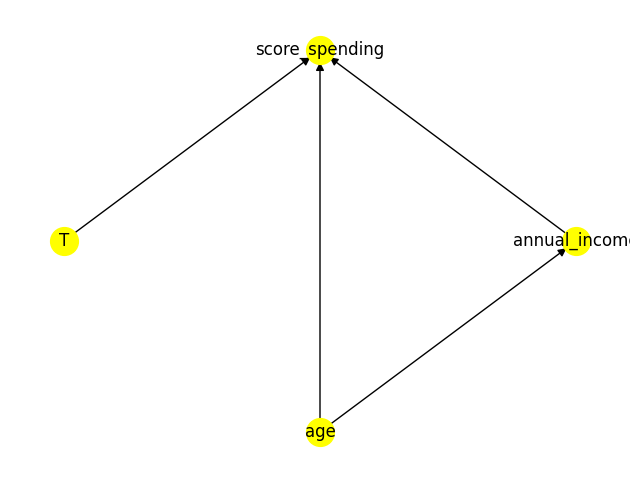

In [23]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

import warnings
# Ignore only FutureWarnings
warnings.filterwarnings("ignore")

# Dataset Simulation
np.random.seed(42)
data = {
    # Simulating ages between 18 and 65
    'age': np.random.randint(18, 65, size=100),
    # Simulating annual incomes between 20k and 150k
    'annual_income': np.random.randint(20000, 150000, size=100),
    # Simulating spending scores between 20 and 100
    'score_spending': np.random.randint(20, 100, size=100)
}

df = pd.DataFrame(data)

# Treatment variable setting
df['T'] = df['annual_income'].apply(lambda x: 1 if x > 50000 else 0)


# Cauasal Modelling using DoWhy
model = CausalModel(
    data=df,
    treatment='T',
    outcome='score_spending',
    common_causes=['age','T'],  # Possibile confounder
    graph="""
    digraph {
        age -> annual_income -> score_spending;
        age -> score_spending;
        T [label="T (annual_income > 50k)"];
        T -> score_spending;
    }
    """
)

# DAG Visualization
model.view_model()

# Causal effect identification
identified_estimand = model.identify_effect()

# Causal effect esimation using Linear Regression
estimate = model.estimate_effect(
    identified_estimand, method_name="backdoor.linear_regression")
# Stampa del risultato
print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['age', 'annual_income']}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                     
────(E[score_spending])
d[T]                   
Estimand assumption 1, Unconfoundedness: If U→{T} and U→score_spending then P(score_spending|T,,U) = P(score_spending|T,)

## Realized estimand
b: score_spending~T+T*age+T*annual_income
Target units: ate

## Estimate
Mean value: -4.3966306900890615
### Conditional Estimates
__categorical__age  __categorical__annual_income
(17.999, 26.0]      (20205.999, 46071.8]            -5.097921
                    (46071.8, 73757.6]              -6.868250
                    (73757.6, 102219.6]             -8.486289
                    (102219.6, 129782.2]           

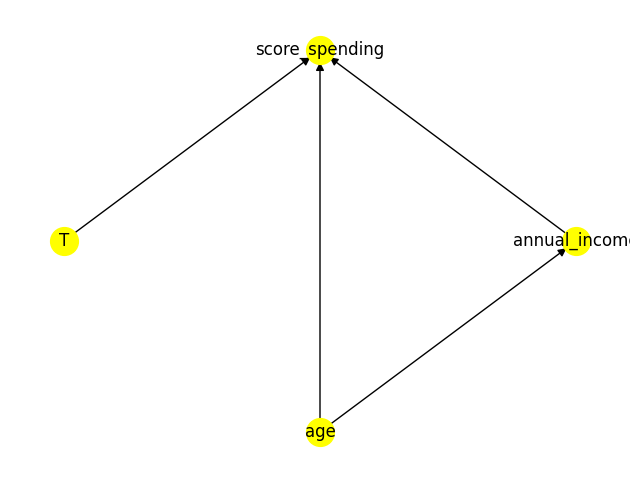

In [24]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

'''
1. Dataset Simulation

The simulated dataset contains 100 observations and three main variables:

    age: People's age, simulated with random values between 18 and 65 years.
    annual_income: Annual income, simulated with random values between $20,000 and $150,000.
    score_spending: Spending score, simulated with random values between 20 and 100.

Then, a new variable T is created as a treatment variable, representing whether a person earns more than $50,000 per year (T=1 for those earning more than $50,000, T=0 for those earning less).
'''
np.random.seed(42)
data = {
    'age': np.random.randint(18, 65, size=100),
    'annual_income': np.random.randint(20000, 150000, size=100),
    'score_spending': np.random.randint(20, 100, size=100)
}

df = pd.DataFrame(data)
df['T'] = df['annual_income'].apply(lambda x: 1 if x > 50000 else 0)


'''
2. Causal Model with DoWhy
The next step is constructing a causal model using DoWhy.
Causal model creation:
- Treatment: The treatment variable is T, which represents whether annual income is greater than $50,000.
- Outcome: The outcome variable is score_spending, indicating a person's spending score.
- Common causes: The variable age is considered a confounder as it influences both income (annual_income) and spending score (score_spending).

Causal Diagram (DAG):
The causal graph specifies the structure of causal relationships between the variables:
- age influences both annual_income and score_spending.
- annual_income (represented by T) directly influences score_spending.
'''
model = CausalModel(
    data=df,
    treatment='T',
    outcome='score_spending',
    common_causes=['age', 'T'],  # Possibile confounder
    graph="""
    digraph {
        age -> annual_income -> score_spending;
        age -> score_spending;
        T [label="T (annual_income > 50k)"];
        T -> score_spending;
    }
    """
)
# DAG Visualization
model.view_model()


'''
3. Causal Effect Identification
At this stage, DoWhy uses the causal graph to determine if the causal effect of interest (the effect of treatment T on score_spending) is identifiable. 
Based on the DAG structure and the backdoor criterion, the method determines whether there is sufficient information to identify the desired causal effect.
'''
identified_estimand = model.identify_effect()


'''
4. Causal Effect Estimation
At this stage, the causal effect is estimated using linear regression. The backdoor.linear_regression method applies the backdoor criterion to adjust for potential confounders (in this case, age) and estimate the effect of T (the treatment) on score_spending (the outcome).
Then, estimated effect result is printed:
'''
estimate = model.estimate_effect(
    identified_estimand, method_name="backdoor.linear_regression")
# Stampa del risultato
print(estimate)

Identified Estimand:  Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                             
─────────────────────(E[Spending_Score])
d[Age  Annual_Income]                   
Estimand assumption 1, Unconfoundedness: If U→{Age,Annual_Income} and U→Spending_Score then P(Spending_Score|Age,Annual_Income,,U) = P(Spending_Score|Age,Annual_Income,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal Effect Estimate:  *** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                             
─────────────────────(E[Spending_Score])
d[A

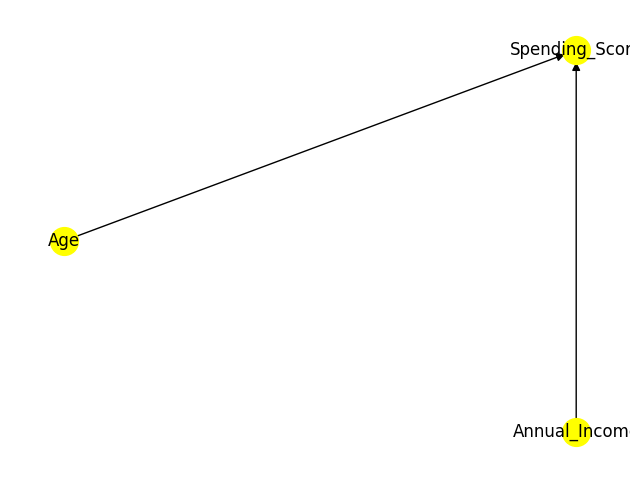

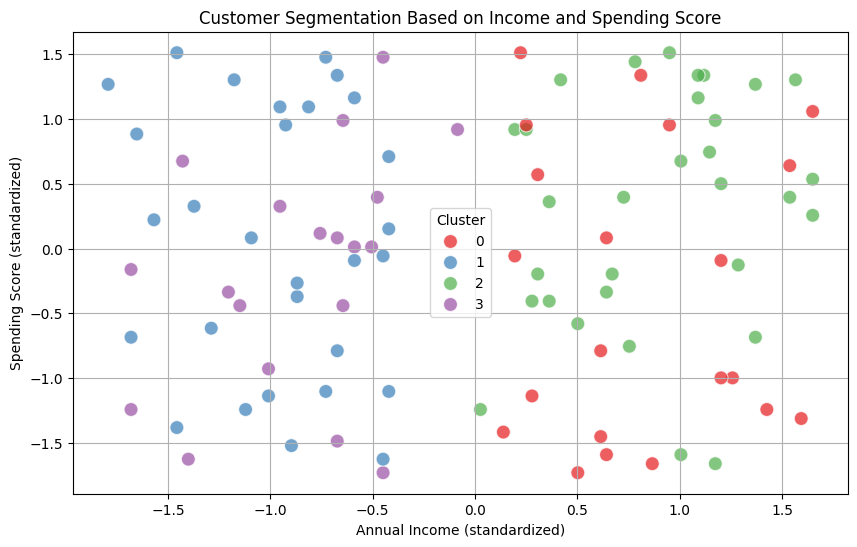

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel
import warnings
warnings.filterwarnings("ignore")

# Simulate dataset (use your actual data from Power BI)
# For illustration, we assume the dataset contains 'Age', 'Annual_Income', 'Spending_Score', and 'CustomerID'.
data = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=100),
    'Annual_Income': np.random.randint(15, 140, size=100),
    'Spending_Score': np.random.randint(1, 100, size=100),
    'CustomerID': np.arange(1, 101)
})

# Step 1: Data Preprocessing - Normalize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(
    data[['Age', 'Annual_Income', 'Spending_Score']])
data[['Age', 'Annual_Income', 'Spending_Score']] = data_scaled

# Step 2: Define Causal Model (assuming 'Age' and 'Annual_Income' affect 'Spending_Score')
causal_model = CausalModel(
    data=data,
    treatment=['Age', 'Annual_Income'],
    outcome='Spending_Score',
    common_causes=None  # Specify common causes if known
)

# Step 3: Visualize the Causal Graph
causal_model.view_model()

# Step 4: Identify the Causal Effect
identified_estimand = causal_model.identify_effect()
print("Identified Estimand: ", identified_estimand)

# Step 5: Estimate the Causal Effect using a linear regression as an example
estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Effect Estimate: ", estimate)

# Step 6: Refute the estimate using placebo tests (robustness checks)
refutation = causal_model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter")
print("Refutation: ", refutation)

# Step 7: Optional - Use causal effects for clustering (simplified approach here)
# For illustration purposes, we cluster based on 'Age' and 'Annual_Income', but ideally, you'd use causal effects.
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Annual_Income']])

# Step 8: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score',
                hue='Cluster', data=data, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation Based on Income and Spending Score')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance':

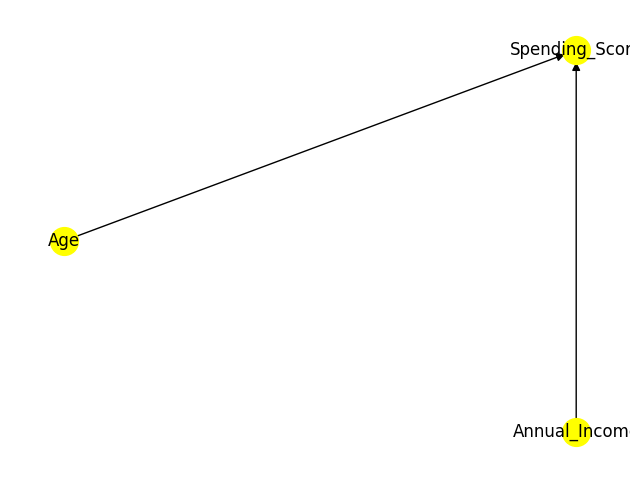

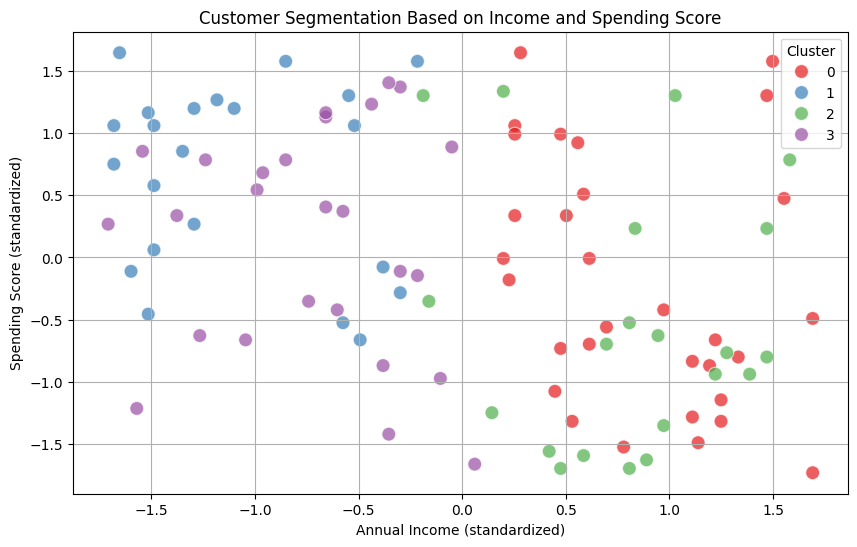

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel

# Step 1: Access dataset from Power BI
# The dataset is automatically passed by Power BI
#data = dataset[['Age', 'Annual_Income', 'Spending_Score']]

data = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=100),
    'Annual_Income': np.random.randint(15, 140, size=100),
    'Spending_Score': np.random.randint(1, 100, size=100),
    'CustomerID': np.arange(1, 101)
})

# Step 2: Data Preprocessing - Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(
    data[['Age', 'Annual_Income', 'Spending_Score']])
data[['Age', 'Annual_Income', 'Spending_Score']] = data_scaled

# Step 3: Define the Causal Model
causal_model = CausalModel(
    data=data,
    treatment=['Age', 'Annual_Income'],  # Causes we are interested in
    outcome='Spending_Score',  # The outcome we want to analyze
    # Specify common causes if known (e.g., CustomerID, though not always necessary)
    common_causes=None
)

# Step 4: Visualize the Causal Graph
causal_model.view_model()

# Step 5: Identify the Causal Effect
identified_estimand = causal_model.identify_effect()
# print("Identified Estimand: ", identified_estimand)

# Step 6: Estimate the Causal Effect
estimate = causal_model.estimate_effect(identified_estimand,
                                        method_name="backdoor.linear_regression")
# print("Causal Effect Estimate: ", estimate)

# Step 7: Refute the estimate for robustness
refutation = causal_model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
# print("Refutation: ", refutation)

# Step 8: Optional - Use causal effects for clustering
# For illustration purposes, we will use KMeans clustering based on 'Age' and 'Annual_Income'
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Annual_Income']])

# Step 9: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score',
                hue='Cluster', data=data, palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation Based on Income and Spending Score')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from dowhy import CausalModel

# Load your dataset (this example assumes a CSV file)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(
    data[['Age', 'Annual_Income', 'Spending_Score']])
data[['Age', 'Annual_Income', 'Spending_Score']] = data_scaled

# Step 2: Data Preprocessing - Standardize the data
scaler = StandardScaler()
data[['Age', 'Annual_Income', 'Spending_Score']] = scaler.fit_transform(
    data[['Age', 'Annual_Income', 'Spending_Score']])

# Step 3: Define the Causal Model
causal_model = CausalModel(
    data=data,
    treatment=['Age', 'Annual_Income'],
    outcome='Spending_Score',
    common_causes=None
)

# Step 4: Identify the Causal Effect
identified_estimand = causal_model.identify_effect()
print("Identified Estimand: ", identified_estimand)

# Step 5: Estimate the Causal Effect
estimate = causal_model.estimate_effect(identified_estimand,
                                        method_name="backdoor.linear_regression")
print("Causal Effect Estimate: ", estimate)

# Step 6: Refute the estimate for robustness
refutation = causal_model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter")
print("Refutation: ", refutation)

# Save results to a file for Power BI integration
results = pd.DataFrame({
    'causal_estimate': [estimate.value],
    'refutation': [refutation.new_effect]
})
results.to_csv("causal_results.csv", index=False)

Identified Estimand:  Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                             
─────────────────────(E[Spending_Score])
d[Age  Annual_Income]                   
Estimand assumption 1, Unconfoundedness: If U→{Age,Annual_Income} and U→Spending_Score then P(Spending_Score|Age,Annual_Income,,U) = P(Spending_Score|Age,Annual_Income,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': None, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
Causal Effect Estimate:  *** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                             
─────────────────────(E[Spending_Score])
d[A